# 📊 Análise Exploratória de Dados Logísticos

## Objetivo
Este notebook apresenta uma análise exploratória completa dos dados operacionais de logística, 
identificando padrões, tendências e oportunidades de otimização.

## Estrutura da Análise
1. **Carregamento e Preparação dos Dados**
2. **Análise Descritiva**
3. **Análise de Custos**
4. **Análise de Rentabilidade**
5. **Análise Temporal**
6. **Identificação de Anomalias**
7. **Conclusões e Recomendações**

---

## 1. Configuração e Importações

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configurações
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Configuração de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


## 2. Carregamento dos Dados

In [2]:
# Carregar dados
try:
    dados_logistica = pd.read_csv('../data/dados_logistica.csv')
    dados_mensais = pd.read_csv('../data/dados_mensais.csv')
    tabela_acoes = pd.read_csv('../data/tabela_acoes.csv')
    
    # Converter coluna de data
    dados_logistica['Data'] = pd.to_datetime(dados_logistica['Data'])
    
    print("✅ Dados carregados com sucesso!")
    print(f"📅 Período analisado: {dados_logistica['Data'].min().strftime('%d/%m/%Y')} a {dados_logistica['Data'].max().strftime('%d/%m/%Y')}")
    print(f"📊 Total de registros diários: {len(dados_logistica)}")
    print(f"📊 Total de meses: {len(dados_mensais)}")
    print(f"📋 Total de ações planejadas: {len(tabela_acoes)}")
    
except FileNotFoundError as e:
    print(f"❌ Erro ao carregar dados: {e}")
    print("Certifique-se de que os arquivos CSV estão na pasta 'data/'")

✅ Dados carregados com sucesso!
📅 Período analisado: 01/01/2024 a 30/09/2024
📊 Total de registros diários: 274
📊 Total de meses: 9
📋 Total de ações planejadas: 10


## 3. Visão Geral dos Dados

In [3]:
# Estrutura dos dados
print("=" * 80)
print("ESTRUTURA DOS DADOS LOGÍSTICOS")
print("=" * 80)
print(dados_logistica.info())
print(" + " "=" * 80)
print("PRIMEIRAS LINHAS")
print("=" * 80)
dados_logistica.head(10)

ESTRUTURA DOS DADOS LOGÍSTICOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               274 non-null    datetime64[ns]
 1   Custo Combustível  274 non-null    float64       
 2   Custo Manutenção   274 non-null    float64       
 3   Custo Motorista    274 non-null    float64       
 4   Custo Total        274 non-null    float64       
 5   KM Percorridos     274 non-null    float64       
 6   Entregas           274 non-null    int64         
 7   Peso (ton)         274 non-null    float64       
 8   Frete              274 non-null    float64       
 9   Margem             274 non-null    float64       
 10  Margem %           274 non-null    float64       
 11  Custo/KM           274 non-null    float64       
 12  Entregas/Dia       274 non-null    int64         
 13  KM/Entrega         274 non-null   

,Data,Custo Combustível,Custo Manutenção,Custo Motorista,Custo Total,KM Percorridos,Entregas,Peso (ton),Frete,Margem,Margem %,Custo/KM,Entregas/Dia,KM/Entrega,Mês
0,2024-01-01,949.82,404.54,656.09,2010.45,10334.49,120,60.80,2725.89,715.44,26.25,0.19,120,86.12,2024-01
1,2024-01-02,1180.29,400.61,731.70,2312.59,10787.18,82,82.31,3990.96,1678.37,42.05,0.21,82,131.55,2024-01
2,2024-01-03,1092.80,519.32,656.05,2268.16,11761.77,85,71.44,2892.70,624.54,21.59,0.19,85,138.37,2024-01
3,2024-01-04,1039.46,459.99,755.65,2255.10,14438.99,84,76.77,2667.14,412.04,15.45,0.16,84,171.89,2024-01
4,2024-01-05,862.41,480.79,665.57,2008.77,10424.42,84,78.39,3160.95,1152.18,36.45,0.19,84,124.10,2024-01
5,2024-01-06,862.40,518.32,668.28,2049.00,10428.67,133,65.24,2177.53,128.54,5.90,0.20,133,78.41,2024-01
6,2024-01-07,823.23,556.00,763.00,2142.23,13162.51,126,67.17,3923.33,1781.10,45.40,0.16,126,104.46,2024-01
7,2024-01-08,1146.47,335.20,621.04,2102.71,11165.53,128,65.70,3269.92,1167.21,35.70,0.19,128,87.23,2024-01
8,2024-01-09,1040.45,350.23,540.20,1930.88,9572.23,88,69.40,3509.68,1578.79,44.98,0.20,88,108.78,2024-01
9,2024-01-10,1083.23,237.59,508.63,1829.46,11167.08,99,41.47,2340.96,511.50,21.85,0.16,99,112.80,2024-01


## 4. Estatísticas Descritivas

In [4]:
# Estatísticas descritivas completas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)

stats = dados_logistica.describe()
print(stats.round(2))

# Adicionar informações adicionais
print(
" +" "=" * 80)
print("INFORMAÇÕES ADICIONAIS")
print("=" * 80)

print(f"💰 CUSTOS:")
print(f"   Custo Total Médio/Dia: R$ {dados_logistica['Custo Total'].mean():,.2f}")
print(f"   Custo Total Mediano/Dia: R$ {dados_logistica['Custo Total'].median():,.2f}")
print(f"   Desvio Padrão: R$ {dados_logistica['Custo Total'].std():,.2f}")

print(f"📊 RECEITAS:")
print(f"   Frete Médio/Dia: R$ {dados_logistica['Frete'].mean():,.2f}")
print(f"   Frete Mediano/Dia: R$ {dados_logistica['Frete'].median():,.2f}")

print(f"💹 MARGENS:")
print(f"   Margem Média: {dados_logistica['Margem %'].mean():.2f}%")
print(f"   Margem Mediana: {dados_logistica['Margem %'].median():.2f}%")
print(f"   Margem Mínima: {dados_logistica['Margem %'].min():.2f}%")
print(f"   Margem Máxima: {dados_logistica['Margem %'].max():.2f}%")

ESTATÍSTICAS DESCRITIVAS
                      Data  Custo Combustível  Custo Manutenção  \
count                  274             274.00            274.00   
mean   2024-05-16 12:00:00             999.72            405.83   
min    2024-01-01 00:00:00             802.02            204.34   
25%    2024-03-09 06:00:00             896.05            309.76   
50%    2024-05-16 12:00:00            1005.27            415.35   
75%    2024-07-23 18:00:00            1104.56            510.79   
max    2024-09-30 00:00:00            1196.02            599.89   
std                    NaN             118.59            121.41   

       Custo Motorista  Custo Total  KM Percorridos  Entregas  Peso (ton)  \
count           274.00       274.00          274.00    274.00      274.00   
mean            644.35      2049.90        11382.86    113.64       64.91   
min             501.39      1585.75         8076.97     80.00       40.13   
25%             569.00      1922.14         9615.40     96.00  

## 5. Análise Detalhada de Custos

COMPOSIÇÃO DOS CUSTOS
💵 Custo Combustível: R$ 273,924.44 (48.8%)
🔧 Custo Manutenção: R$ 111,196.38 (19.8%)
👨‍✈️ Custo Motorista: R$ 176,550.83 (31.4%)
💰 CUSTO TOTAL: R$ 561,671.64


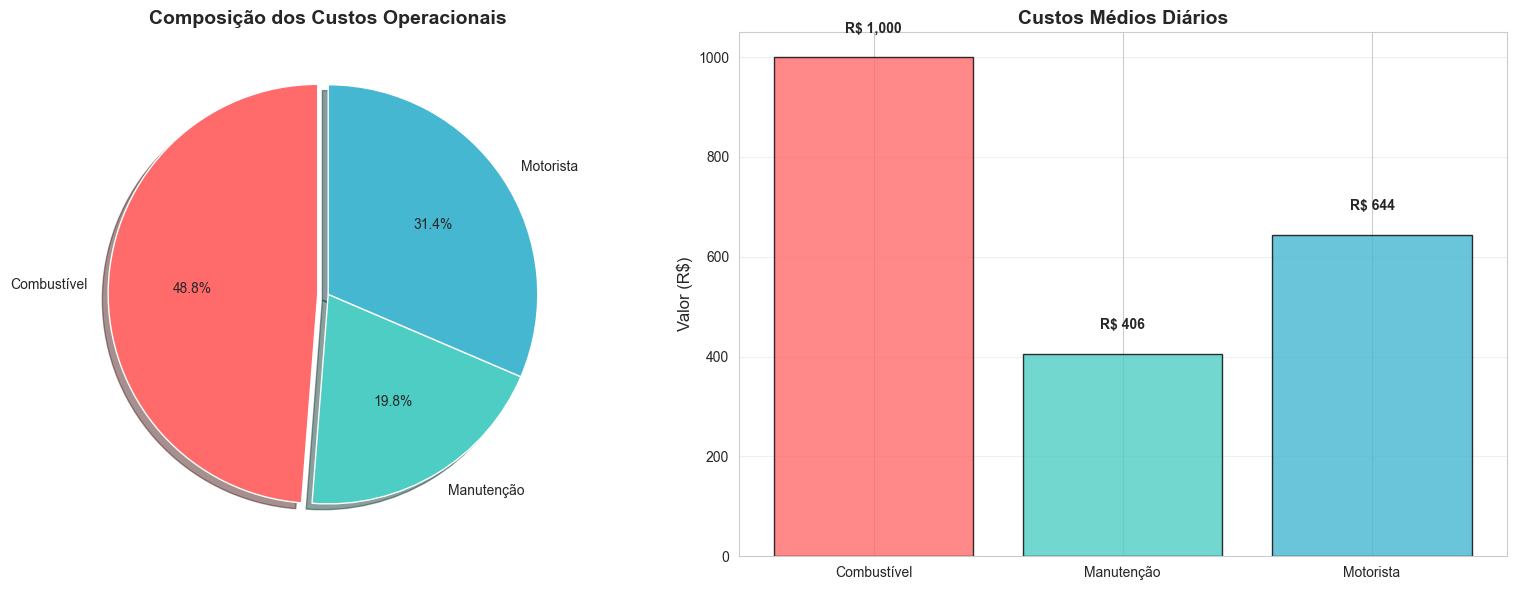

In [5]:
# Composição dos custos
custo_combustivel_total = dados_logistica['Custo Combustível'].sum()
custo_manutencao_total = dados_logistica['Custo Manutenção'].sum()
custo_motorista_total = dados_logistica['Custo Motorista'].sum()
custo_total = dados_logistica['Custo Total'].sum()

print("=" * 80)
print("COMPOSIÇÃO DOS CUSTOS")
print("=" * 80)

print(f"💵 Custo Combustível: R$ {custo_combustivel_total:,.2f} ({custo_combustivel_total/custo_total*100:.1f}%)")
print(f"🔧 Custo Manutenção: R$ {custo_manutencao_total:,.2f} ({custo_manutencao_total/custo_total*100:.1f}%)")
print(f"👨‍✈️ Custo Motorista: R$ {custo_motorista_total:,.2f} ({custo_motorista_total/custo_total*100:.1f}%)")
print(f"💰 CUSTO TOTAL: R$ {custo_total:,.2f}")

# Gráfico de pizza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pizza - Composição de custos
custos = [custo_combustivel_total, custo_manutencao_total, custo_motorista_total]
labels = ['Combustível', 'Manutenção', 'Motorista']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
explode = (0.05, 0, 0)

ax1.pie(custos, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
ax1.set_title('Composição dos Custos Operacionais', fontsize=14, fontweight='bold')

# Barras - Custos médios diários
custos_medios = {
    'Combustível': dados_logistica['Custo Combustível'].mean(),
    'Manutenção': dados_logistica['Custo Manutenção'].mean(),
    'Motorista': dados_logistica['Custo Motorista'].mean()
}

ax2.bar(custos_medios.keys(), custos_medios.values(), color=colors, alpha=0.8, edgecolor='black')
ax2.set_title('Custos Médios Diários', fontsize=14, fontweight='bold')
ax2.set_ylabel('Valor (R$)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

for i, (k, v) in enumerate(custos_medios.items()):
    ax2.text(i, v + 50, f'R$ {v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Análise de Rentabilidade

ANÁLISE DE RENTABILIDADE
💰 Frete Total: R$ 811,284.42
💹 Margem Total: R$ 249,612.78
📊 Margem Percentual Média: 28.10%
📈 CLASSIFICAÇÃO DOS DIAS:
   🟢 Excelente (≥35%): 105 dias (38.3%)
   🔵 Bom (25-35%): 59 dias (21.5%)
   🟡 Regular (20-25%): 26 dias (9.5%)
   🔴 Crítico (<20%): 84 dias (30.7%)


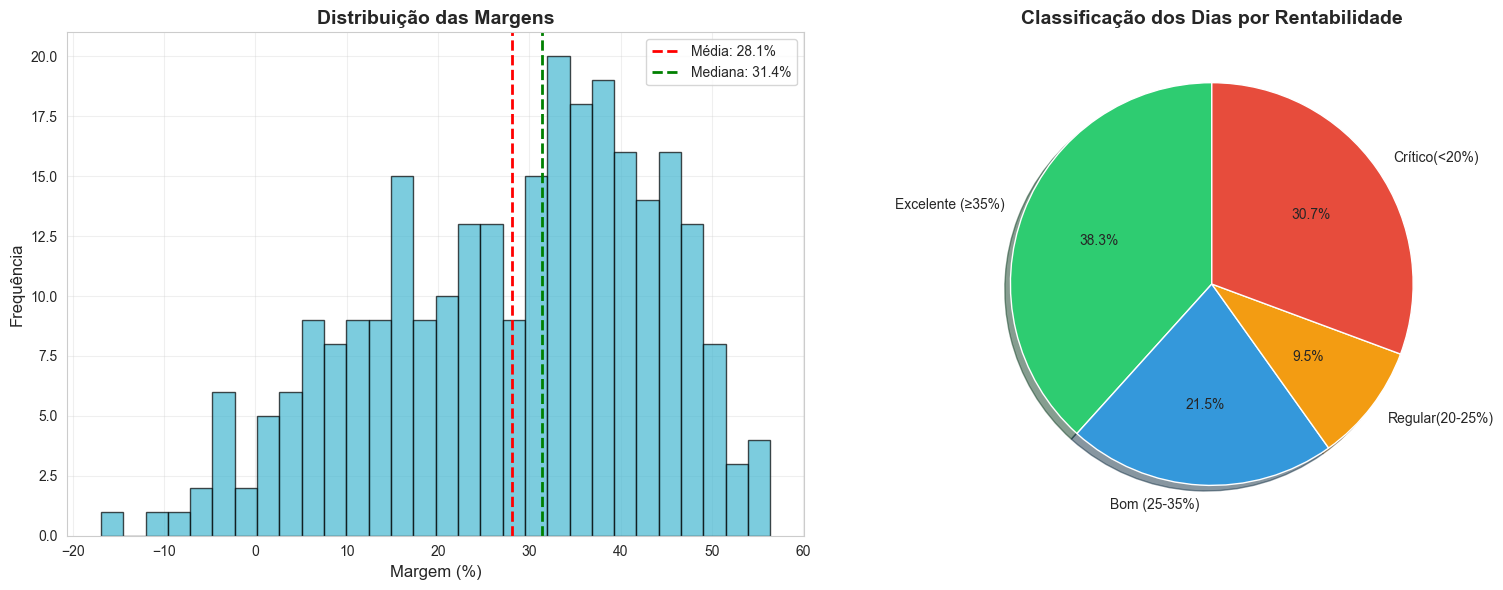

In [6]:
# Análise de rentabilidade
print("=" * 80)
print("ANÁLISE DE RENTABILIDADE")
print("=" * 80)

margem_total = dados_logistica['Margem'].sum()
frete_total = dados_logistica['Frete'].sum()

print(f"💰 Frete Total: R$ {frete_total:,.2f}")
print(f"💹 Margem Total: R$ {margem_total:,.2f}")
print(f"📊 Margem Percentual Média: {dados_logistica['Margem %'].mean():.2f}%")

# Classificação de dias por rentabilidade
dias_excelente = len(dados_logistica[dados_logistica['Margem %'] >= 35])
dias_bom = len(dados_logistica[(dados_logistica['Margem %'] >= 25) & (dados_logistica['Margem %'] < 35)])
dias_regular = len(dados_logistica[(dados_logistica['Margem %'] >= 20) & (dados_logistica['Margem %'] < 25)])
dias_critico = len(dados_logistica[dados_logistica['Margem %'] < 20])

print(f"📈 CLASSIFICAÇÃO DOS DIAS:")
print(f"   🟢 Excelente (≥35%): {dias_excelente} dias ({dias_excelente/len(dados_logistica)*100:.1f}%)")
print(f"   🔵 Bom (25-35%): {dias_bom} dias ({dias_bom/len(dados_logistica)*100:.1f}%)")
print(f"   🟡 Regular (20-25%): {dias_regular} dias ({dias_regular/len(dados_logistica)*100:.1f}%)")
print(f"   🔴 Crítico (<20%): {dias_critico} dias ({dias_critico/len(dados_logistica)*100:.1f}%)")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Distribuição de margens
ax1.hist(dados_logistica['Margem %'], bins=30, color='#45B7D1', alpha=0.7, edgecolor='black')
ax1.axvline(dados_logistica['Margem %'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {dados_logistica["Margem %"].mean():.1f}%')
ax1.axvline(dados_logistica['Margem %'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {dados_logistica["Margem %"].median():.1f}%')
ax1.set_xlabel('Margem (%)', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_title('Distribuição das Margens', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Pizza - Classificação de dias
classificacao = [dias_excelente, dias_bom, dias_regular, dias_critico]
labels_class = ['Excelente (≥35%)',
 'Bom (25-35%)', 
 'Regular(20-25%)', 
 'Crítico(<20%)']
colors_class = ['#2ECC71', '#3498DB', '#F39C12', '#E74C3C']

ax2.pie(classificacao, labels=labels_class, autopct='%1.1f%%', startangle=90,
        colors=colors_class, shadow=True)
ax2.set_title('Classificação dos Dias por Rentabilidade', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Análise Temporal e Tendências

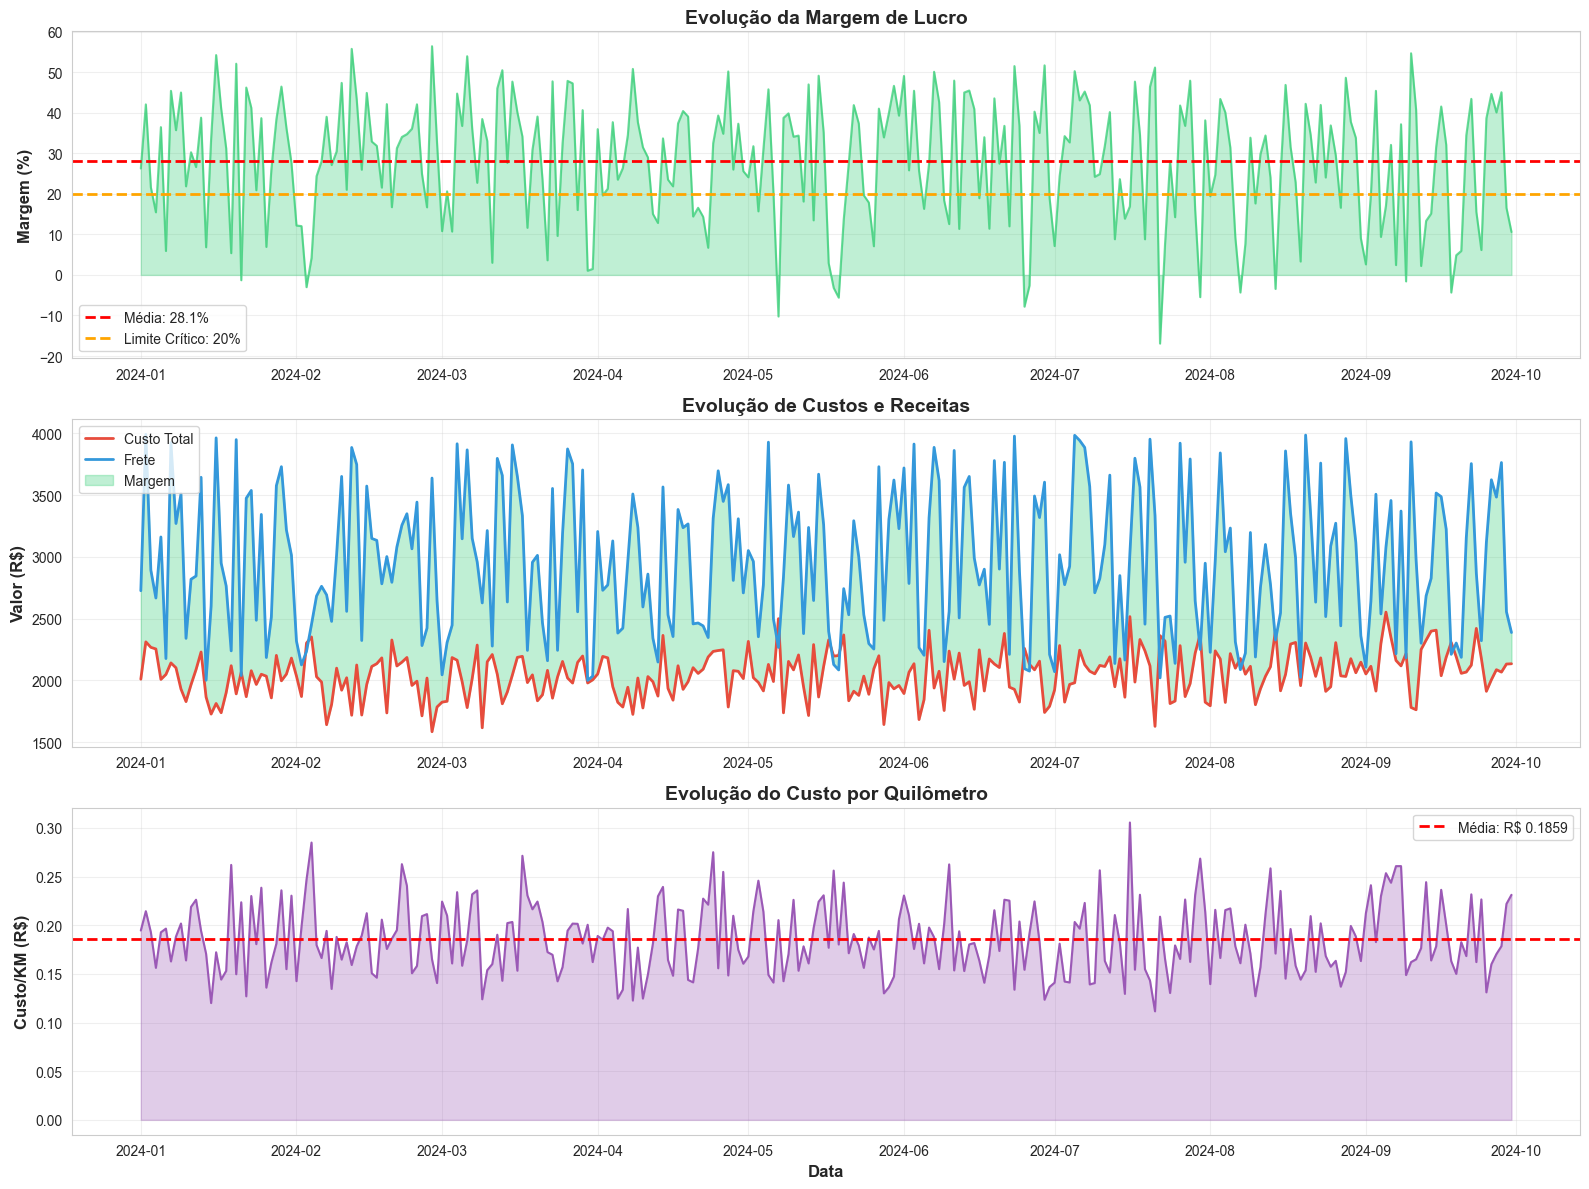

 += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += +=
ANÁLISE MENSAL
    Mês  Custo Total    Frete   Margem  Margem %
2024-01     62615.39 93554.30 30938.90     33.07
2024-02     57614.56 84549.62 26935.05     31.86
2024-03     62452.09 92676.17 30224.08     32.61
2024-04     60658.17 87222.39 26564.23     30.46
2024-05     63446.06 89601.92 26155.86     29.19
2024-06     60812.13 91433.08 30620.96     33.49
2024-07     64598.31 93447.31 28849.00     30.87
2024-08     64843.50 91024.36 26180.85     28.76
2024-09     64631.43 87775.26 23143.84     26.37


In [7]:
# Análise temporal
dados_logistica_sorted = dados_logistica.sort_values('Data')

# Criar figura com subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Gráfico 1: Evolução da Margem
axes[0].plot(dados_logistica_sorted['Data'], dados_logistica_sorted['Margem %'], 
             color='#2ECC71', linewidth=1.5, alpha=0.7)
axes[0].axhline(y=dados_logistica['Margem %'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Média: {dados_logistica["Margem %"].mean():.1f}%')
axes[0].axhline(y=20, color='orange', linestyle='--', linewidth=2, label='Limite Crítico: 20%')
axes[0].fill_between(dados_logistica_sorted['Data'], dados_logistica_sorted['Margem %'], 
                      alpha=0.3, color='#2ECC71')
axes[0].set_ylabel('Margem (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Evolução da Margem de Lucro', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Gráfico 2: Evolução dos Custos
axes[1].plot(dados_logistica_sorted['Data'], dados_logistica_sorted['Custo Total'], 
             label='Custo Total', color='#E74C3C', linewidth=2)
axes[1].plot(dados_logistica_sorted['Data'], dados_logistica_sorted['Frete'], 
             label='Frete', color='#3498DB', linewidth=2)
axes[1].fill_between(dados_logistica_sorted['Data'], dados_logistica_sorted['Custo Total'],
                      dados_logistica_sorted['Frete'], alpha=0.3, color='#2ECC71', 
                      label='Margem')
axes[1].set_ylabel('Valor (R$)', fontsize=12, fontweight='bold')
axes[1].set_title('Evolução de Custos e Receitas', fontsize=14, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(alpha=0.3)

# Gráfico 3: Custo por KM
axes[2].plot(dados_logistica_sorted['Data'], dados_logistica_sorted['Custo/KM'], 
             color='#9B59B6', linewidth=1.5)
axes[2].axhline(y=dados_logistica['Custo/KM'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Média: R$ {dados_logistica["Custo/KM"].mean():.4f}')
axes[2].fill_between(dados_logistica_sorted['Data'], dados_logistica_sorted['Custo/KM'], 
                      alpha=0.3, color='#9B59B6')
axes[2].set_xlabel('Data', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Custo/KM (R$)', fontsize=12, fontweight='bold')
axes[2].set_title('Evolução do Custo por Quilômetro', fontsize=14, fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas por mês
print(" +" "=" * 80)
print("ANÁLISE MENSAL")
print("=" * 80)
dados_mensais_sorted = dados_mensais.sort_values('Mês')
print(dados_mensais_sorted[['Mês', 'Custo Total', 'Frete', 'Margem', 'Margem %']].to_string(index=False))

## 8. Análise de Eficiência Operacional

EFICIÊNCIA OPERACIONAL
🚚 ENTREGAS:
   Total de entregas: 31,137
   Média de entregas/dia: 114
   Mediana de entregas/dia: 112
🛣️ QUILOMETRAGEM:
   Total de KM percorridos: 3,118,903 km
   Média de KM/dia: 11,383 km
   Média de KM/entrega: 103.52 km
📦 CARGA:
   Total transportado: 17,784.10 toneladas
   Média/dia: 64.91 toneladas
 += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += += +=
CORRELAÇÃO ENTRE VARIÁVEIS OPERACIONAIS


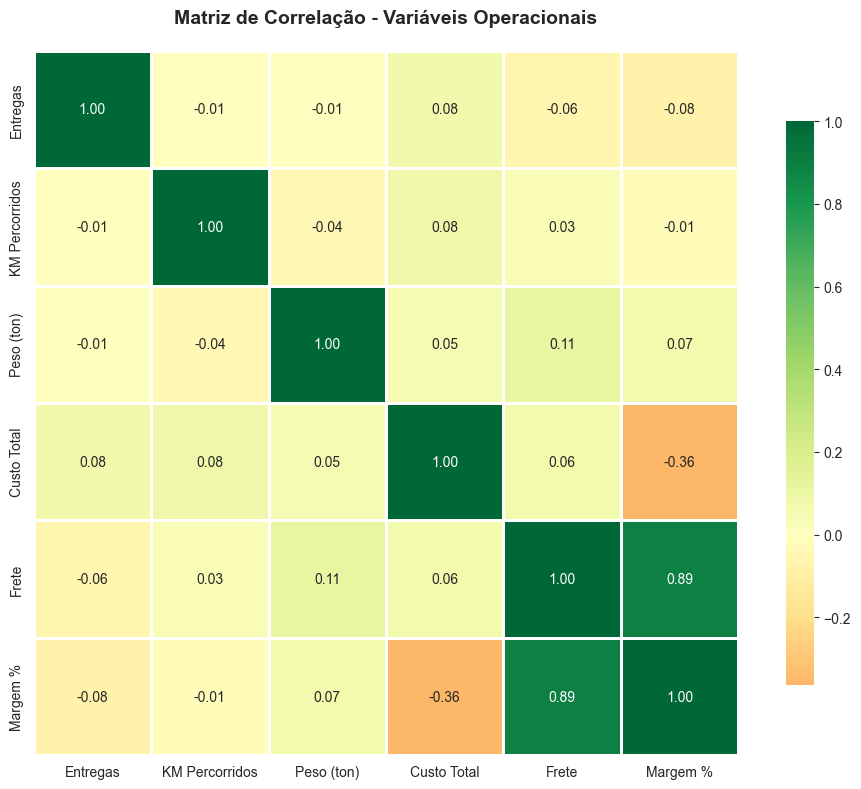

📊 Principais correlações identificadas:
   • Frete ↔ Margem %: 0.89


In [8]:
# Análise de eficiência operacional
print("=" * 80)
print("EFICIÊNCIA OPERACIONAL")
print("=" * 80)

print(f"🚚 ENTREGAS:")
print(f"   Total de entregas: {dados_logistica['Entregas'].sum():,.0f}")
print(f"   Média de entregas/dia: {dados_logistica['Entregas'].mean():.0f}")
print(f"   Mediana de entregas/dia: {dados_logistica['Entregas'].median():.0f}")

print(f"🛣️ QUILOMETRAGEM:")
print(f"   Total de KM percorridos: {dados_logistica['KM Percorridos'].sum():,.0f} km")
print(f"   Média de KM/dia: {dados_logistica['KM Percorridos'].mean():,.0f} km")
print(f"   Média de KM/entrega: {dados_logistica['KM/Entrega'].mean():.2f} km")

print(f"📦 CARGA:")
print(f"   Total transportado: {dados_logistica['Peso (ton)'].sum():,.2f} toneladas")
print(f"   Média/dia: {dados_logistica['Peso (ton)'].mean():.2f} toneladas")

# Correlação entre variáveis
print(" +" "=" * 80)
print("CORRELAÇÃO ENTRE VARIÁVEIS OPERACIONAIS")
print("=" * 80)

colunas_analise = ['Entregas', 'KM Percorridos', 'Peso (ton)', 'Custo Total', 'Frete', 'Margem %']
correlacao = dados_logistica[colunas_analise].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Operacionais', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("📊 Principais correlações identificadas:")
for i in range(len(correlacao.columns)):
    for j in range(i+1, len(correlacao.columns)):
        corr_value = correlacao.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"   • {correlacao.columns[i]} ↔ {correlacao.columns[j]}: {corr_value:.2f}")

## 9. Identificação de Anomalias e Dias Críticos

DIAS CRÍTICOS (Margem < 20%)
Total de dias críticos: 84 (30.7% do período)
🔴 TOP 10 PIORES DIAS:
      Data  Margem %  Custo Total   Frete  Entregas  KM/Entrega
2024-07-22    -16.93      2362.91 2020.86       120       94.33
2024-05-07    -10.25      2500.03 2267.61       108      112.80
2024-06-25     -7.82      2259.58 2095.66       139      105.41
2024-05-19     -5.60      2202.08 2085.27       146       83.71
2024-07-30     -5.48      2373.80 2250.47       111       79.68
2024-09-18     -4.34      2307.90 2211.86       101      140.14
2024-08-07     -4.34      2177.97 2087.47       117      115.68
2024-08-14     -3.45      2407.66 2327.37        85      165.77
2024-05-18     -3.19      2197.18 2129.23       106       80.94
2024-02-03     -3.02      2302.75 2235.30       138       67.64
📊 CARACTERÍSTICAS DOS DIAS CRÍTICOS:
   Margem média: 8.88%
   Custo/KM médio: R$ 0.1925
   KM/Entrega médio: 102.96 km
   Entregas médias: 115
⚠️ DIAS COM ALTO CUSTO/KM (Top 10%):
   Total de dias: 

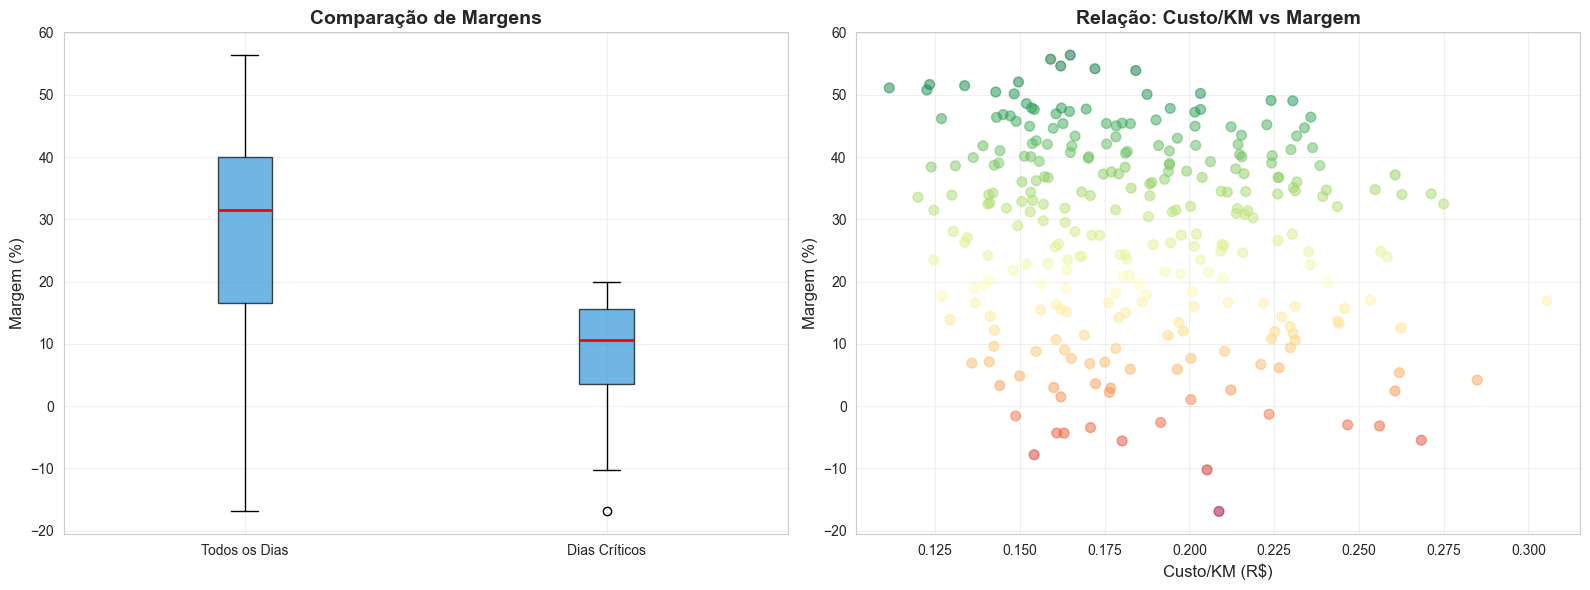

In [9]:
# Identificar dias críticos
dias_criticos = dados_logistica[dados_logistica['Margem %'] < 20].sort_values('Margem %')

print("=" * 80)
print(f"DIAS CRÍTICOS (Margem < 20%)")
print("=" * 80)
print(f"Total de dias críticos: {len(dias_criticos)} ({len(dias_criticos)/len(dados_logistica)*100:.1f}% do período)")

if len(dias_criticos) > 0:
    print(f"🔴 TOP 10 PIORES DIAS:")
    print(dias_criticos[['Data', 'Margem %', 'Custo Total', 'Frete', 'Entregas', 'KM/Entrega']].head(10).to_string(index=False))
    
    # Análise dos dias críticos
    print(f"📊 CARACTERÍSTICAS DOS DIAS CRÍTICOS:")
    print(f"   Margem média: {dias_criticos['Margem %'].mean():.2f}%")
    print(f"   Custo/KM médio: R$ {dias_criticos['Custo/KM'].mean():.4f}")
    print(f"   KM/Entrega médio: {dias_criticos['KM/Entrega'].mean():.2f} km")
    print(f"   Entregas médias: {dias_criticos['Entregas'].mean():.0f}")

# Identificar dias com alto custo/km
alto_custo_km = dados_logistica[dados_logistica['Custo/KM'] > dados_logistica['Custo/KM'].quantile(0.9)]

print(f"⚠️ DIAS COM ALTO CUSTO/KM (Top 10%):")
print(f"   Total de dias: {len(alto_custo_km)}")
print(f"   Custo/KM médio: R$ {alto_custo_km['Custo/KM'].mean():.4f}")
print(f"   vs. Média geral: R$ {dados_logistica['Custo/KM'].mean():.4f}")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot de margens
ax1.boxplot([dados_logistica['Margem %'], dias_criticos['Margem %']], 
            labels=['Todos os Dias', 'Dias Críticos'],
            patch_artist=True,
            boxprops=dict(facecolor='#3498DB', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax1.set_ylabel('Margem (%)', fontsize=12)
ax1.set_title('Comparação de Margens', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Scatter: Custo/KM vs Margem
ax2.scatter(dados_logistica['Custo/KM'], dados_logistica['Margem %'], 
           alpha=0.5, s=50, c=dados_logistica['Margem %'], cmap='RdYlGn')
ax2.set_xlabel('Custo/KM (R$)', fontsize=12)
ax2.set_ylabel('Margem (%)', fontsize=12)
ax2.set_title('Relação: Custo/KM vs Margem', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Plano de Ações e Impacto Potencial

PLANO DE AÇÕES
📋 AÇÕES PLANEJADAS:
 ID                  Ação  Prioridade  Impacto  Esforço  Prazo    Status
 A1  Renegociar contratos     Urgente    45000       40     30  Iniciado
 A2  Controle combustível     Urgente    30000       70     30  Pendente
 A3        Otimizar rotas     Urgente    22000       50     30  Pendente
 A4 Manutenção preventiva     Urgente    18000       60     30  Pendente
 A5    Treinar motoristas     Urgente    12000       30     30  Pendente
 A6      Sistema previsão Prioritária    35000       85     60 Planejado
 A7        Expandir frota Prioritária    50000       90     90 Planejado
 A8 Diversificar clientes Prioritária    50000       65     90 Planejado
 A9         Renovar frota   Planejada    80000       95    180 Planejado
A10         ERP integrado   Planejada    40000       90    180 Planejado
 + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = +

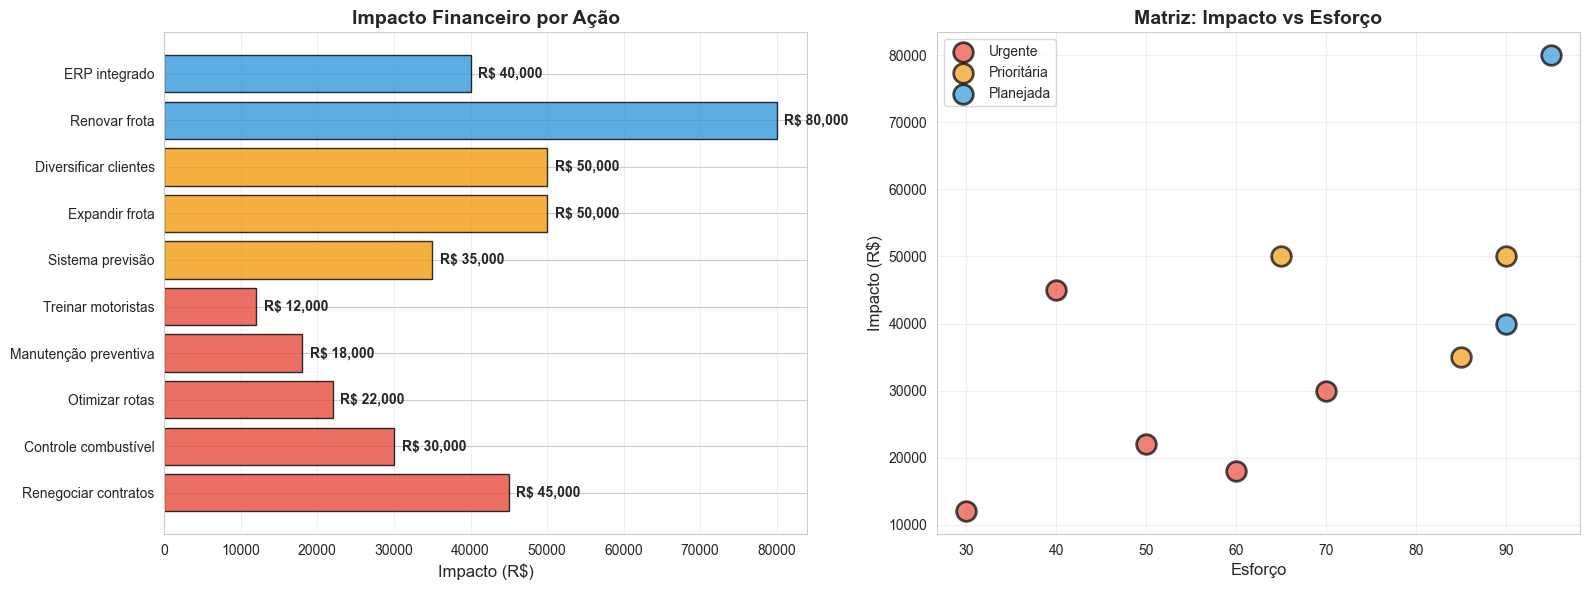

 + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + = + =
IMPACTO POTENCIAL
💰 Margem atual (projeção anual): R$ 332,513.37
💡 Impacto potencial das ações: R$ 382,000.00
📈 Aumento potencial: 114.9%


In [10]:
# Análise do plano de ações
print("=" * 80)
print("PLANO DE AÇÕES")
print("=" * 80)

print("📋 AÇÕES PLANEJADAS:")
print(tabela_acoes.to_string(index=False))

# Análise por prioridade
print(" + " "=" * 80)
print("ANÁLISE POR PRIORIDADE")
print("=" * 80)

for prioridade in ['Urgente', 'Prioritária', 'Planejada']:
    acoes_prioridade = tabela_acoes[tabela_acoes['Prioridade'] == prioridade]
    if len(acoes_prioridade) > 0:
        impacto_total = acoes_prioridade['Impacto'].sum()
        esforco_medio = acoes_prioridade['Esforço'].mean()
        prazo_medio = acoes_prioridade['Prazo'].mean()
        
        print(f"🎯 {prioridade.upper()}:")
        print(f"   Quantidade de ações: {len(acoes_prioridade)}")
        print(f"   Impacto total: R$ {impacto_total:,.2f}")
        print(f"   Esforço médio: {esforco_medio:.0f}/100")
        print(f"   Prazo médio: {prazo_medio:.0f} dias")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Impacto por ação
cores_prioridade = {'Urgente': '#E74C3C', 'Prioritária': '#F39C12', 'Planejada': '#3498DB'}
cores = [cores_prioridade[p] for p in tabela_acoes['Prioridade']]

ax1.barh(tabela_acoes['Ação'], tabela_acoes['Impacto'], color=cores, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Impacto (R$)', fontsize=12)
ax1.set_title('Impacto Financeiro por Ação', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, v in enumerate(tabela_acoes['Impacto']):
    ax1.text(v + 1000, i, f'R$ {v:,.0f}', va='center', fontweight='bold')

# Scatter - Impacto vs Esforço
for prioridade in tabela_acoes['Prioridade'].unique():
    dados_p = tabela_acoes[tabela_acoes['Prioridade'] == prioridade]
    ax2.scatter(dados_p['Esforço'], dados_p['Impacto'], 
               label=prioridade, s=200, alpha=0.7, 
               color=cores_prioridade[prioridade], edgecolors='black', linewidth=2)

ax2.set_xlabel('Esforço', fontsize=12)
ax2.set_ylabel('Impacto (R$)', fontsize=12)
ax2.set_title('Matriz: Impacto vs Esforço', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Cálculo do ROI potencial
impacto_total_acoes = tabela_acoes['Impacto'].sum()
margem_atual_anual = dados_logistica['Margem'].sum() * (365 / len(dados_logistica))

print(f" + " "=" * 80)
print("IMPACTO POTENCIAL")
print("=" * 80)
print(f"💰 Margem atual (projeção anual): R$ {margem_atual_anual:,.2f}")
print(f"💡 Impacto potencial das ações: R$ {impacto_total_acoes:,.2f}")
print(f"📈 Aumento potencial: {(impacto_total_acoes/margem_atual_anual*100):.1f}%")

## 11. Conclusões e Recomendações

### 📊 Principais Descobertas

#### 1. **Rentabilidade**
- A margem média está em torno de 28%, mas com tendência de queda nos últimos meses
- Aproximadamente 30% dos dias apresentam margem crítica (<20%)
- Existe alta variabilidade na rentabilidade diária

#### 2. **Custos**
- Combustível representa o maior componente de custo (~48%)
- Custo por quilômetro tem apresentado aumento
- Existe correlação entre custo/km elevado e baixa rentabilidade

#### 3. **Eficiência Operacional**
- Média de entregas/dia está estável
- KM por entrega pode ser otimizado
- Dias com maior número de entregas não necessariamente têm melhor margem

### 🎯 Recomendações Prioritárias

#### **Ações Urgentes (30 dias)**
1. **Renegociar contratos** - Impacto: R$ 45.000
2. **Implementar controle de combustível** - Impacto: R$ 30.000
3. **Otimizar rotas** - Impacto: R$ 22.000

#### **Ações Prioritárias (60-90 dias)**
4. Implementar sistema de previsão de demanda
5. Expandir frota de forma estratégica
6. Diversificar base de clientes

#### **Ações de Longo Prazo (180 dias)**
7. Renovação gradual da frota
8. Implementação de ERP integrado

### 💡 Próximos Passos

1. **Análise Preditiva**: Desenvolver modelos para prever dias de baixa rentabilidade
2. **Benchmarking**: Comparar métricas com padrões do setor
3. **Monitoramento**: Implementar dashboard em tempo real
4. **Otimização**: Aplicar algoritmos de otimização de rotas

---

**Nota**: Esta análise deve ser atualizada mensalmente para acompanhamento contínuo dos KPIs.

## 12. Exportação de Resultados

In [11]:
# Criar resumo executivo
resumo = {
    'periodo_analise': f"{dados_logistica['Data'].min().strftime('%d/%m/%Y')} a {dados_logistica['Data'].max().strftime('%d/%m/%Y')}",
    'total_dias': len(dados_logistica),
    'margem_media': round(dados_logistica['Margem %'].mean(), 2),
    'custo_km_medio': round(dados_logistica['Custo/KM'].mean(), 4),
    'entregas_totais': int(dados_logistica['Entregas'].sum()),
    'km_totais': int(dados_logistica['KM Percorridos'].sum()),
    'dias_criticos': int(len(dados_logistica[dados_logistica['Margem %'] < 20])),
    'impacto_acoes': float(tabela_acoes['Impacto'].sum())
}

# Salvar resumo
import json
with open('../outputs/resumo_executivo.json', 'w', encoding='utf-8') as f:
    json.dump(resumo, f, indent=4, ensure_ascii=False)

print("✅ Resumo executivo salvo em 'outputs/resumo_executivo.json'")
print("📊 RESUMO EXECUTIVO:")
for chave, valor in resumo.items():
    print(f"   {chave}: {valor}")

✅ Resumo executivo salvo em 'outputs/resumo_executivo.json'
📊 RESUMO EXECUTIVO:
   periodo_analise: 01/01/2024 a 30/09/2024
   total_dias: 274
   margem_media: 28.1
   custo_km_medio: 0.1859
   entregas_totais: 31137
   km_totais: 3118903
   dias_criticos: 84
   impacto_acoes: 382000.0
